Linear Regression is a model that assumes the data is linear through which it produces a line that best fits the data using thee function y = wx + b where:
* y: prediction
* w: the weight
* x: the input
* b: the output

It adjusts it's weights and bias i.e. changing the position and slope of the line by calculating how much error was made producing the line. It calculates how far the line if from all data points in general and tried to correct itself as it goes through each iteration. There are many error functions used one of them being a mean squared error.






Let us first plot a simple graph to show what a regression model would look like

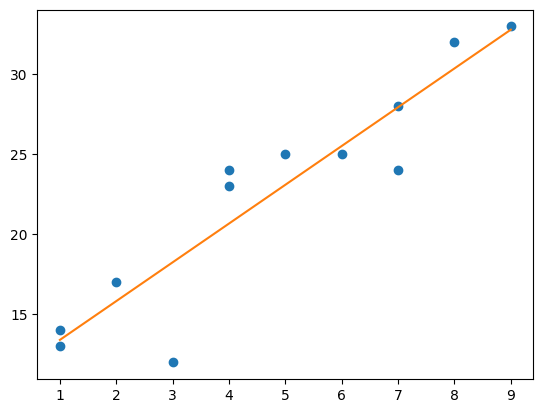

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Let's plot a linear distribution of points with a line of best fit

#create some data
x = np.array([1, 1, 2, 3, 4, 4, 5, 6, 7, 7, 8, 9])
y = np.array([13, 14, 17, 12, 23, 24, 25, 25, 24, 28, 32, 33])

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot
plt.plot(x, m*x+b)

We use a gradient descent to calculate the minimum MSE and what it does is, it finds the derivative of the error funtion, i.e as w and b changes, how does the error change. So with each error calculated it substracts from the parameters until we reach a global minimum. The derivative accounts for negative and positive sign so that is goes in the dirention it needs to (if derivative is +ve w reduces and if -ve it increases) this change is regulated by the learning rate so if you want the steps to go small at a time we take a small learning rate otherwise we opt for a larger one.                   
STEPS:
*   Initialize params as 0 (w and b)
*   Predict by using y = wx + b
*   Calculate Error
*   Use gradient descent to find out new weights and biases
*   repeat until end of epochs






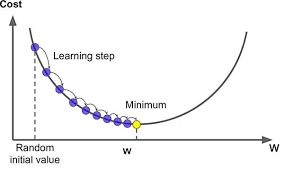

In [13]:
class LinearRegression:
# we define the weights, bias, learning rate, and number of iterations or epochs
  def __init__(self, lr=0.01, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def gradientDescent(self, X, y_pred, y_true, n_samples):

    # this funtions applies the gradient descent formula and returns the result of the derivative function
    dw = (1/n_samples) * np.dot(X.T, (y_pred - y_true))
    db = (1/n_samples) * np.sum(y_pred - y_true)
    return dw, db # the shape of dw is a list of length n_features and db is a number

  def fit(self, X, y):

    n_samples, n_features = X.shape # we define the number of features and samples

    # we initialize the bias as 0 and the weights based on the number of features for eg. if there was data with 2 samples and 2 features like:
    #  [1 2]
    #  [3 4] the weight array would be [0 0] because it has 2 columns which represent as features.
    #  (ps. there should be a larger bracket encapsulating the whole input but cannot do that in comments)
    self.weights = np.zeros(n_features)
    self.bias = 0

    # we go through each iteration and perform the steps to reach a global minimum on the error
    for _ in range(self.n_iters):
      y_pred = self.predict(X)
      dw, db = self.gradientDescent(X, y_pred, y, n_samples)
      # substract the derivative times the learning rate from the weights
      self.weights -= self.lr * dw
      self.bias -= self.lr * db


  def predict(self,X):
    # apply y = w * x +  b
    return np.dot(X, self.weights) + self.bias


Now that we have made a Linear Regression model let us test it on some data and see how well it performs

370.71276696205155


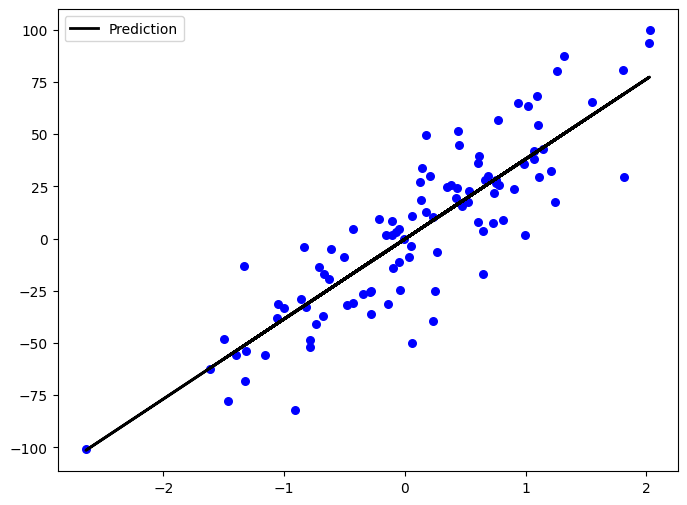

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X,y = datasets.make_regression(n_samples=100, n_features=1, noise=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression(lr=0.01)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
  return np.mean((y_test - predictions)**2)

mse_value = mse(y_test, predictions)
print(mse_value)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color="b", marker="o", s=30)
plt.plot(X[:,0], reg.predict(X), color="k", linewidth=2, label="Prediction")
plt.legend()
plt.show()

As you can see it fits the data very well and the mse error was fairly small. You can experiment with different learning rates and epochs to get better results but that is all. Thank you for reading!!.